**Let's import all the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We are going to read the data directly from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data as we don't need another repo wihcih basically does the same format.
**We have to provide datafram column names and we will get it from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names**

In [6]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = "\s+", 
                   names =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name']) 
df.head(7) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


Our Task now is to find the column with unknow values and makes them to 0 also change the column to numberic.<br>
**Let's start with making the cloumn numberic.**<br>
***At present the columns are:***

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

***Horse Power is an object*** <br>
The .to_numeric() method will not convert “?” to a number, so it will raise an exception.We have to tell Pandas how to handle values it can’t convert to a number by using the optional errors argument:

In [14]:
df["horsepower"]=pd.to_numeric(df["horsepower"], errors="coerce")
df.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


We have to a lot of NaN values. We need to mark them into 0.

In [16]:
df1=df.fillna(0)
df1.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


In [27]:
df.dtypes #To check if the type changed

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe'. Converting origin column to string so it will be easier to change.

In [30]:
df["origin"]= df["origin"].astype(str)
df_list=df["origin"].values #Extracting the column to a list
for n, i in enumerate(df_list):
    if i == "1":
        df_list[n] = "USA"
    if i== "2":
        df_list[n] = "Asia"
    if i== "3":
        df_list[n] = "Europe"
df["origin"]=df_list  #adding back to column
df.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,chevrolet impala


**Create a bar chart that shows the distribution for cylinders.** <br>
I will create a side by side bar chart

sns.barplot(x = 'origin', y = 'model year', hue = 'cylinders', color= 'orchid', data = df)

**Create a scatterplot that shows the relationship between horsepower and weight.**

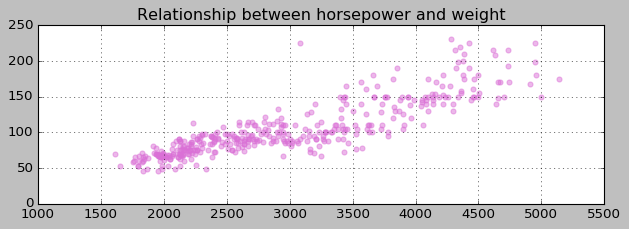

In [41]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(df.weight, df.horsepower, alpha=0.5, color='orchid')
ax.set_title('Relationship between horsepower and weight')
ax.grid(True)
fig.tight_layout(pad=1)

***Advanced plot created from the auto-mpg dataset using pandas and seaborn***

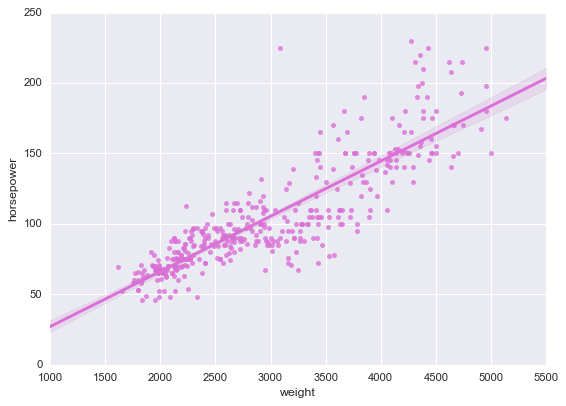

In [48]:
sns.set(color_codes=True)
sns.regplot(x=df.weight, y=df.horsepower, data=df, color='orchid')

It looks like a lower end heavy machines have similar horsepower but it varies are the weight increases!